# **Importing the nessecary Modules**

In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

# **Loading and Splitting the Data**

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print(f'Training Images : {(x_train.shape)}')
print(f'Testing Images : {(x_test.shape)}')

Training Images : (50000, 32, 32, 3)
Testing Images : (10000, 32, 32, 3)


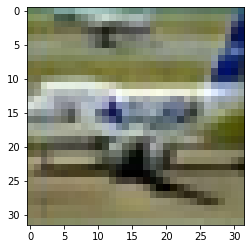

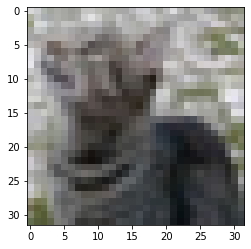

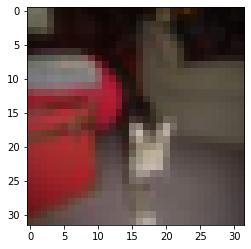

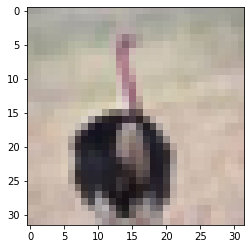

In [4]:
for i in range(332,336):
  img = x_train[i]
  plt.imshow(img)
  plt.show()

# **Preprocessing the Data**

In [5]:
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")


x_train /= 255
x_test /= 255
n_classes = 10


print("Shape before one-hot encoding : ",y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_test = np_utils.to_categorical(y_test,n_classes)
print("Shape before one-hot encoding : ",Y_train.shape)

Shape before one-hot encoding :  (50000, 1)
Shape before one-hot encoding :  (50000, 10)


# **Building The Model**

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten


model = Sequential()

#convolutional layers

model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))

model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(100,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())


#hidden layers

model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))


#output layers

model.add(Dense(10,activation='softmax'))

#Compiling

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

#training model

model.fit(x_train,Y_train,batch_size=128,epochs=20,validation_data=(x_test,Y_test))


Epoch 1/20
391/391 [==============================] - 24s 22ms/step - loss: 1.6831 - accuracy: 0.3736 - val_loss: 1.2244 - val_accuracy: 0.5520
Epoch 2/20
391/391 [==============================] - 8s 20ms/step - loss: 1.1850 - accuracy: 0.5743 - val_loss: 0.9862 - val_accuracy: 0.6498
Epoch 3/20
391/391 [==============================] - 8s 20ms/step - loss: 0.9705 - accuracy: 0.6559 - val_loss: 0.8746 - val_accuracy: 0.6924
Epoch 4/20
391/391 [==============================] - 8s 20ms/step - loss: 0.8632 - accuracy: 0.6995 - val_loss: 0.7178 - val_accuracy: 0.7503
Epoch 5/20
391/391 [==============================] - 8s 20ms/step - loss: 0.7785 - accuracy: 0.7271 - val_loss: 0.6928 - val_accuracy: 0.7555
Epoch 6/20
391/391 [==============================] - 8s 21ms/step - loss: 0.7204 - accuracy: 0.7466 - val_loss: 0.6671 - val_accuracy: 0.7706
Epoch 7/20
391/391 [==============================] - 8s 21ms/step - loss: 0.6641 - accuracy: 0.7677 - val_loss: 0.6501 - val_accuracy: 0.776

# **Predicting**

In [7]:
classes = range(0,10)

names = [
         'airplain',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

class_labels = dict(zip(classes, names))


batch = x_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 155ms/step


In [8]:
print(predictions)

[[1.9215867e-04 1.1375255e-06 3.1901237e-02 1.4838004e-02 3.3149940e-01
  6.6949680e-02 1.8884784e-04 5.5437577e-01 4.8236866e-06 4.8922921e-05]
 [7.8084267e-04 7.2526786e-04 6.3167185e-02 1.1691278e-01 1.8172769e-02
  6.7572981e-01 1.0074636e-01 1.3798251e-02 8.7882597e-03 1.1785245e-03]
 [1.3657756e-05 1.3338227e-04 1.8830327e-02 6.4141653e-02 5.0787209e-04
  1.4984688e-01 7.6622033e-01 2.1761673e-04 6.4980042e-05 2.3333258e-05]
 [4.8836100e-05 8.5685942e-06 4.5824363e-03 9.2312282e-01 3.4168333e-02
  1.9270297e-02 1.4503679e-02 4.0126704e-03 4.1966861e-05 2.4025045e-04]
 [1.3533541e-11 9.9999464e-01 6.8658976e-20 1.2359779e-16 1.3963657e-21
  1.7110722e-21 5.8759242e-18 3.3606888e-21 3.4783192e-09 5.3676367e-06]
 [1.1793935e-10 9.9999118e-01 6.9262572e-17 2.7595087e-13 4.0058542e-19
  2.9690196e-17 1.3310297e-14 3.5918661e-19 5.6778074e-08 8.7718645e-06]
 [1.8227363e-02 2.4025531e-04 2.1438488e-01 5.0977486e-01 1.5750125e-02
  1.4025056e-01 7.9445504e-02 6.7668287e-03 1.4972195e-02 

In [9]:
for image in predictions:
  print(np.sum(image))


0.99999994
1.0000001
1.0
0.9999999
1.0
1.0
1.0
1.0000001
1.0


# **Final Object Detection**

In [10]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[7 5 6 3 1 1 3 6 8]


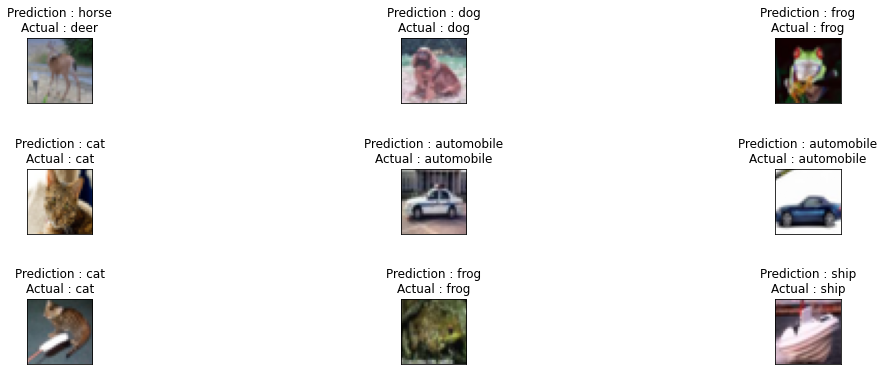

In [11]:
fig, axs = plt.subplots(3,3,figsize = (19,6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i,img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i]==key:
      title = f'Prediction : {class_labels[key]}\nActual : {class_labels[labels[i]]}'
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  #plotting the image
  axs[i].imshow(img)

#showing plot
plt.show()